### Задание 1. Статистика.
Для набора данных : https://archive.ics.uci.edu/ml/datasets/auto+mpg
1. Импортировать data set.
2. Провести предобработку (проверить на наличие выбросов, пропусков). Если есть
выбросы, удалить. Если есть пропуски, обработать, как сочтёте нужным.
3. Найти числовые характеристики признаков и зависимой переменной.
4. Проверить на наличие связей зависимой переменной с факторами и факторов между
собой, применяя методы корреляционного анализа и сравнения групп.
5. Визуализировать данные и зависимости между ними.

### Задание 2. Регрессионный анализ.
На основании результатов Задания 1, выбрать значимые факторы и построить регрессионную
модель зависимой переменной от признаков, предварительно разбив выборку на обучающую
и тестовую.
Предложить разные алгоритмы. Выбрать наилучший.

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns
import sklearn.linear_model as lm

pd.options.display.max_rows = 8

# Импорт данных

In [ ]:
# Загрузка файла данных
from google.colab import files
uploaded = files.upload()

Saving auto-mpg.data to auto-mpg.data


In [ ]:
cars = pd.read_csv('auto-mpg.data', sep='\s+',
                   names=['mpg',
                          'cylinders',
                          'displacement',
                          'horsepower',
                          'weight',
                          'acceleration',
                          'model_year',
                          'origin',
                          'car_name'])

In [ ]:
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
...,...,...,...,...,...,...,...,...,...
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger
397,31.0,4,119.0,82.00,2720.0,19.4,82,1,chevy s-10


По условиям задачи в столбце horsepower 6 значений пропущено (Missing Attribute Values:  horsepower has 6 missing values).

In [ ]:
# отсортировав по столбцу horsepower, видим, 
# что в пропущенных ячейках стоит знак "?"
cars.sort_values('horsepower', ascending=False)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
...,...,...,...,...,...,...,...,...,...
99,18.0,6,232.0,100.0,2945.0,16.0,73,1,amc hornet
107,18.0,6,232.0,100.0,2789.0,15.0,73,1,amc gremlin
127,19.0,6,232.0,100.0,2901.0,16.0,74,1,amc hornet
199,20.0,6,225.0,100.0,3651.0,17.7,76,1,dodge aspen se


In [ ]:
# находим строки со знаком "?" в столбце horsepower
cars.loc[(cars['horsepower'] == '?')]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


In [ ]:
# удаляем эти строки
cars=cars.drop(cars.index[[32, 126, 330, 336, 354, 374]])

In [ ]:
# меняем тип переменной в столбце horsepower c object на float
cars = cars.astype({'horsepower': np.float})
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car_name      392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


# Выполнение задания. Часть 1 - Статистика

# Визуализация данных и зависимостей между ними


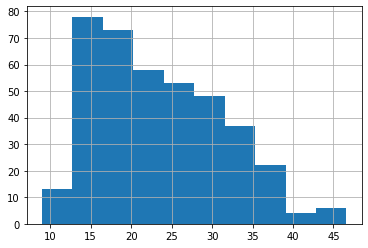

In [ ]:
cars['mpg'].hist(bins=10)  #  гистограмма частотой характеристики целевой переменной mpg

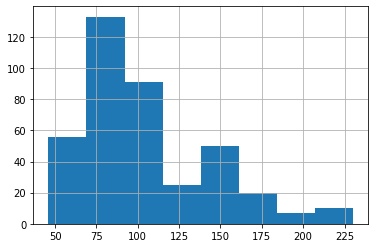

In [ ]:
cars['horsepower'].hist(bins=8)  #  гистограмма частотой характеристики переменной horsepower (мощность двигателя)

Проверка гипотезы о нормальности по Шапиро-Уилку

In [ ]:
stats.shapiro(cars['mpg'])

(0.9671697616577148, 1.0494927948911936e-07)

In [ ]:
stats.shapiro(cars['horsepower'])

(0.9040973782539368, 5.021926207130975e-15)

 В обоих случаях величина p-value значительно ниже стандартного p-уровня значимости 0,05, следовательно нулевую гипотезу о нормальности распределения выборки ОТКЛОНЯЕМ.

In [ ]:
# убираем из набора категориальные величины и оениваем наши данные с помощью функции describe()

cars.drop(['origin','car_name', 'model_year'],axis=1).describe()  

,mpg,cylinders,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000


## Анализ влияния количественных и порядковых признаков

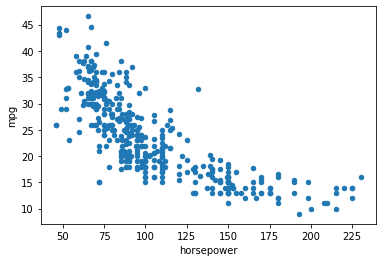

In [ ]:
cars.plot('horsepower','mpg',kind="scatter") 

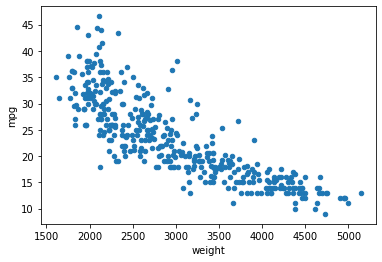

In [ ]:
cars.plot('weight','mpg', kind="scatter")

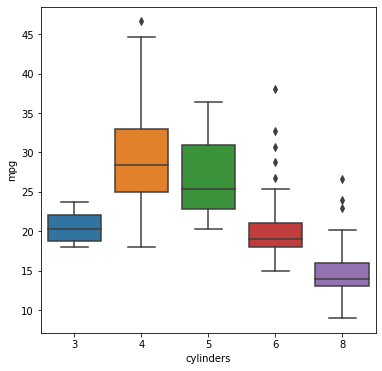

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='cylinders', y='mpg', data=cars)

Хорошо видно, что для автомобилей с 6 и 8 цилиндрами имеются выбросы данных, которые могут привести к ошибкам анализа.

# Проверка корреляции величин 

In [ ]:
# количественная корреляция Пирсона
cars[['mpg', 'cylinders', 'displacement', 'horsepower','weight', 'acceleration']].corr(method='pearson') 

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000


In [ ]:
# ранговая корреляция Спирмена - добавляем пременную model_year имея ввиду, что это порядковая дискретная величина
cars[['mpg', 'cylinders', 'displacement', 'horsepower','weight', 'acceleration', 'model_year']].corr(method='spearman') 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.823175,-0.855234,-0.853616,-0.875585,0.441539,0.574841
cylinders,-0.823175,1.000000,0.913566,0.816188,0.875972,-0.476266,-0.331087
displacement,-0.855234,0.913566,1.000000,0.876171,0.945630,-0.499403,-0.306582
horsepower,-0.853616,0.816188,0.876171,1.000000,0.878819,-0.658142,-0.389498
weight,-0.875585,0.875972,0.945630,0.878819,1.000000,-0.405109,-0.280981
acceleration,0.441539,-0.476266,-0.499403,-0.658142,-0.405109,1.000000,0.278306
model_year,0.574841,-0.331087,-0.306582,-0.389498,-0.280981,0.278306,1.000000


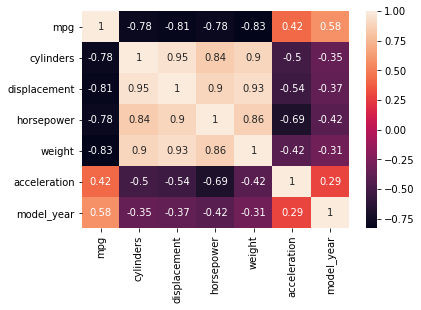

In [ ]:
# визуализация матрицы корреляции (по методу Пирсона)
num = ['mpg', 'cylinders', 'displacement', 'horsepower','weight', 'acceleration', 'model_year']
hm = sns.heatmap(cars[num].corr(),annot=True)

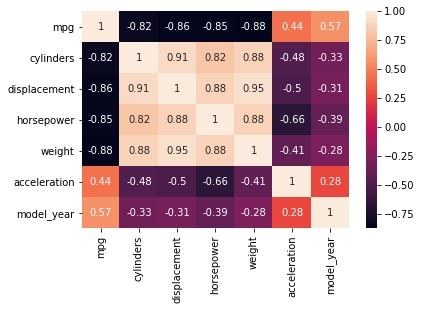

In [ ]:
# визуализация матрицы корреляции (по методу Спирмена)
ran = ['mpg', 'cylinders', 'displacement', 'horsepower','weight', 'acceleration', 'model_year']
hm = sns.heatmap(cars[ran].corr(method = 'spearman'), annot=True)

Наглядно видно, что корреляция факторов как положительная, так и отрицательная. Возможно это вызвано природой нашей целевой переменной mpg. Попробуем посчитать корреляцию для обратной величины gpm (gallon per miles).
 gpm = 1 / mpg.

In [ ]:
cars1 = cars.assign(gpm = 1 / cars.mpg) #  создаем новый датафрем с колонкой gpm 


In [ ]:
cars1.head(1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,gpm
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,0.055556


In [ ]:
# ранговая корреляция Спирмена
cars1[['gpm', 'cylinders', 'displacement', 'horsepower','weight', 'acceleration', 'model_year']].corr(method='spearman') 

,gpm,cylinders,displacement,horsepower,weight,acceleration,model_year
gpm,1.000000,0.823175,0.855234,0.853616,0.875585,-0.441539,-0.574841
cylinders,0.823175,1.000000,0.913566,0.816188,0.875972,-0.476266,-0.331087
displacement,0.855234,0.913566,1.000000,0.876171,0.945630,-0.499403,-0.306582
horsepower,0.853616,0.816188,0.876171,1.000000,0.878819,-0.658142,-0.389498
weight,0.875585,0.875972,0.945630,0.878819,1.000000,-0.405109,-0.280981
acceleration,-0.441539,-0.476266,-0.499403,-0.658142,-0.405109,1.000000,0.278306
model_year,-0.574841,-0.331087,-0.306582,-0.389498,-0.280981,0.278306,1.000000


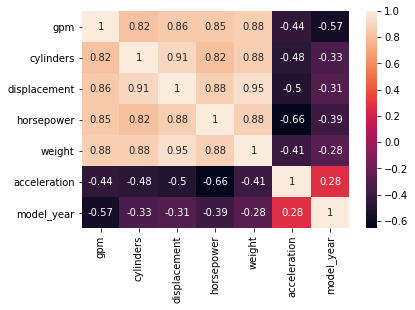

In [ ]:
# визуализация матрицы корреляции (по методу Спирмена)
ran = ['gpm', 'cylinders', 'displacement', 'horsepower','weight', 'acceleration', 'model_year']
hm = sns.heatmap(cars1[ran].corr(method = 'spearman'), annot=True)

Теперь просто бросается в глаза МУЛЬТИКОЛЛИНЕАРНОСТЬ факторов: 'cylinders', 'displacement', 'horsepower', 'weight'. Для дальнейшего анализа оставляем один из них: horsepower (мощность двигателя)

## Анализ влияния категориальных признаков

In [ ]:
# среднее значение расхода топлива (галлон/миля) в зависимости от категориальной
# величины origin (страна происхождения) 1 - USA 2 - Europe 3 - Japan

cars1.groupby('origin')[['gpm']].mean()

,gpm
origin,
1,0.054855
2,0.038216
3,0.034280


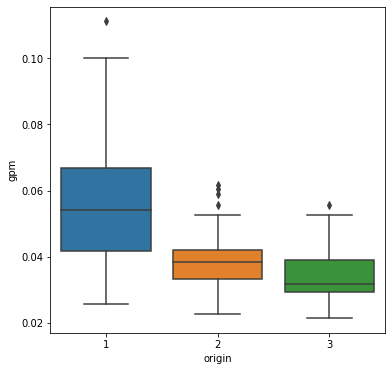

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='origin', y='gpm', data=cars1)

Очевидно, что машины из США имеют гораздо больший расход топлива, чем автомобили из Европы и Японии. Страна происхождения очевидно является значимым фактором, влияющим на целевую переменную (для полной уверенности можно провести сравнение по критерию Краско-Уоллиса)

# Выполнение задания. Часть 2 - Регрессионный анализ


1. Построение классической регрессионной модели традиционным статистическим подходом

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
cars1 # датасет с обратной целевой переменной gpm = 1 / mpg (последний столбец)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,gpm
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,0.055556
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,0.066667
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,0.055556
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,0.062500
...,...,...,...,...,...,...,...,...,...,...
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup,0.022727
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage,0.031250
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger,0.035714
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,chevy s-10,0.032258


In [ ]:
# оцениваем признаки для включения в регрессионную модель
resultsm = smf.ols(
    'gpm ~ cylinders + displacement + horsepower + weight + acceleration + model_year',
     data=cars1).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     488.5
Date:                Sat, 31 Jul 2021   Prob (F-statistic):          1.42e-176
Time:                        05:21:58   Log-Likelihood:                 1471.9
No. Observations:                 392   AIC:                            -2930.
Df Residuals:                     385   BIC:                            -2902.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0895      0.008     11.299      0.000       0.074       0.105
cylinders        0.0014      0.001      2.520      0.012       0.000       0.002
displacement -1.703e-05   1.22e-05     -1.391      0.165   -4.11e-05    7.03e-06
horsepower       0.0001    2.3e-05      4.943      0.000    6.85e-05       0.000
weight        1.109e-05   1.11e-06      9.952      0.000     8.9e-06    1.33e-05
acceleration     0.0003      0.000      1.996      0.047    5.12e-06       0.001
model_year      -0.0013   8.75e-05    -14.465      0.000      -0.001      -0.001
==============================================================================
Omnibus:                       47.189   Durbin-Watson:                   1.463
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.690
Skew:                           0.639   Prob(JB):                     3.05e-23
Kurtosis:                       5.171   Cond. No.                     8.53e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Комментарий: Из таблицы видим, что все факторы значимые (p-value < 0.05), но присутствует МУЛЬТИКОЛЛИНЕАРНОСТЬ факторов. В таком факторе, как мощность двигателя уже учтены и число цилиндров, и объем двигателя, а также вес автомобиля и его динамика (разгон). Эти факторы можно исключить из модели. Остается под вопросом год выпуска. Попробуем построить анализ, оставив величины horsepower и model_year: 

In [ ]:
resultsm = smf.ols(
    'gpm ~ horsepower + model_year ',
     data=cars1).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     690.5
Date:                Sat, 31 Jul 2021   Prob (F-statistic):          1.03e-128
Time:                        05:22:15   Log-Likelihood:                 1346.9
No. Observations:                 392   AIC:                            -2688.
Df Residuals:                     389   BIC:                            -2676.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0978      0.010     10.263      0.000       0.079       0.117
horsepower     0.0003   1.13e-05     28.799      0.000       0.000       0.000
model_year    -0.0011      0.000     -9.363      0.000      -0.001      -0.001
==============================================================================
Omnibus:                       22.530   Durbin-Watson:                   1.212
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.840
Skew:                           0.287   Prob(JB):                     2.48e-11
Kurtosis:                       4.631   Cond. No.                     3.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Мультиколлинеарность сохраняется, поэтому год выпуска тоже исключаем.

In [ ]:
resultsm = smf.ols(
    'gpm ~ horsepower ',
     data=cars1).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     1058.
Date:                Sat, 31 Jul 2021   Prob (F-statistic):          3.72e-113
Time:                        05:22:22   Log-Likelihood:                 1307.0
No. Observations:                 392   AIC:                            -2610.
Df Residuals:                     390   BIC:                            -2602.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0092      0.001      7.290      0.000       0.007       0.012
horsepower     0.0004   1.14e-05     32.530      0.000       0.000       0.000
==============================================================================
Omnibus:                       15.796   Durbin-Watson:                   1.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.034
Skew:                           0.300   Prob(JB):                     6.04e-06
Kurtosis:                       4.055   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


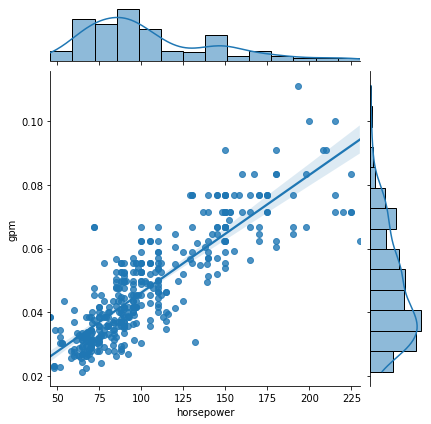

In [ ]:
sns.jointplot('horsepower', 'gpm', data=cars1, kind="reg")

# Влияние категориального фактора origin (страна происхождения)


In [ ]:
# вводим фиктивные переменные на основании столбца origin
cars2 = pd.concat((cars1,pd.get_dummies(cars1.origin, prefix="or", prefix_sep='',)),1)

In [ ]:
cars2.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,gpm,or1,or2,or3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,0.055556,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,0.066667,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,0.055556,1,0,0


In [ ]:
# исключаем or1 в качестве базовой и проверяем регрессию
resultsm = smf.ols('gpm ~ horsepower + or2 + or3', data=cars2).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     402.5
Date:                Sat, 31 Jul 2021   Prob (F-statistic):          1.03e-118
Time:                        05:23:27   Log-Likelihood:                 1327.0
No. Observations:                 392   AIC:                            -2646.
Df Residuals:                     388   BIC:                            -2630.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0151      0.002      9.643      0.000       0.012       0.018
horsepower     0.0003   1.24e-05     26.885      0.000       0.000       0.000
or2           -0.0038      0.001     -3.095      0.002      -0.006      -0.001
or3           -0.0075      0.001     -6.392      0.000      -0.010      -0.005
==============================================================================
Omnibus:                       11.895   Durbin-Watson:                   1.147
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               17.267
Skew:                           0.236   Prob(JB):                     0.000178
Kurtosis:                       3.913   Cond. No.                         510.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Коэффициент детерминации R-square вырос	0.757 (был 0.731), следовательно включение фактора origin в регрессионную модель оправдано!


In [ ]:
# для полученной модели строим прогноз расхода топлива для машины из США мощностью 130 лс
x_new_cars2 = pd.array([1,130,0,0])

In [ ]:
rp=resultsm.params; rp

Intercept     0.015127
horsepower    0.000334
or2          -0.003795
or3          -0.007489
dtype: float64

In [ ]:
y_new_cars2=np.dot(rp,x_new_cars2) # скалярное произведение векторов
print('Прогноз расхода топлива: {:.5f} gal/ml'.format(y_new_cars2)) 

Прогноз расхода топлива: 0.05851 gal/ml


# ПОСТРОЕНИЕ МОДЕЛИ МАШИННОГО ОБУЧЕНИЯ

In [ ]:
from sklearn.metrics import accuracy_score                   # точность
from sklearn.model_selection import train_test_split         # разбиение на обучающую и тестовую выборку

In [ ]:
cars2

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,gpm,or1,or2,or3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,0.055556,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,0.066667,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,0.055556,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,0.062500,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup,0.022727,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage,0.031250,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger,0.035714,1,0,0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,chevy s-10,0.032258,1,0,0


In [ ]:
X=cars2.drop(['mpg', 'gpm', 'origin', 'car_name'],axis=1) 

In [ ]:
X.head() # Матрица признаков (features)

,cylinders,displacement,horsepower,weight,acceleration,model_year,or1,or2,or3
0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,8,302.0,140.0,3449.0,10.5,70,1,0,0


In [ ]:
Y=cars2[['gpm']] # Зависимая (целевая) переменная
Y

,gpm
0,0.055556
1,0.066667
2,0.055556
3,0.062500
...,...
394,0.022727
395,0.031250
396,0.035714
397,0.032258


In [ ]:
Xtrn, Xtest, Ytrn, Ytest = train_test_split(X, Y, test_size=0.25) # разбиение на train и test

In [ ]:
Xtrn.shape # количество наблюдений в обучающей выборке

(294, 9)

In [ ]:
Xtest.shape # количество наблюдений в тестовой выборке

(98, 9)

# Алгоритмы машинного обучения
воспользуемся готовыми моделями:


## 1. Linear Regressor

In [ ]:
LR = lm.LinearRegression()

In [ ]:
model = LR.fit(Xtrn,Ytrn) # Обучение на выборке train

In [ ]:
model.intercept_, model.coef_ # Коэффициенты уравнения модели

(array([0.09057282]),
 array([[ 1.56946203e-03, -1.53284052e-05,  8.13883259e-05,
          1.04187587e-05,  1.41890148e-04, -1.19600519e-03,
          1.50758385e-03, -1.24524891e-03, -2.62334937e-04]]))

In [ ]:
r2 = model.score(Xtrn,Ytrn) # Коэффициент детерминации
r2

0.8809683482203278

In [ ]:
Ytrn_pred=model.predict(Xtrn) # Предсказание на train
Ytest_pred=model.predict(Xtest) # Предсказание на test

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
import math

## Метрики качества
Коэффициент детерминации
$$ R^2=1-\frac{\sum{(y_i-\hat y_i)^2}}{\sum{(y_i-\bar y)^2}}=\frac{\sum{(\hat y_i-\bar y)^2}}{\sum{(y_i-\bar y)^2}} $$

Mean Squared Error
$$ MSE=\frac{1}{n}\sum{(y_i-\hat y_i)^2}$$

Root Mean Squared Error
$$ RMSE=\sqrt{\frac{1}{n}\sum{(y_i-\hat y_i)^2}}$$

In [ ]:
mse_tr= mean_squared_error(Ytrn, Ytrn_pred)
mse_te=mean_squared_error(Ytest, Ytest_pred)

rmse_tr=math.sqrt(mse_tr)
rmse_te=math.sqrt(mse_te)

r2_tr=r2_score(Ytrn, Ytrn_pred)
r2_te=r2_score(Ytest, Ytest_pred)

print('MSE train: {:.6f}, test: {:.6f}'.format(mse_tr, mse_te))

print('RMSE train: {:.6f}, test: {:.6f}'.format(rmse_tr, rmse_te))

print('R2 train: {:.7f}, test: {:.7f}'.format(r2_tr, r2_te))

MSE train: 0.000031, test: 0.000034
RMSE train: 0.005612, test: 0.005846
R2 train: 0.8809683, test: 0.8900205


# 2. Дерево решений (Decision tree)

In [ ]:
 from sklearn import tree

In [ ]:
 dtr = tree.DecisionTreeRegressor()

In [ ]:
 modelTr = dtr.fit(Xtrn, Ytrn)

In [ ]:
Ytrn_pred_Tr=modelTr.predict(Xtrn) # Предсказание на train
Ytest_pred_Tr=modelTr.predict(Xtest) # Предсказание на test

In [ ]:
mse_tr_Tr= mean_squared_error(Ytrn, Ytrn_pred_Tr)
mse_te_Tr=mean_squared_error(Ytest, Ytest_pred_Tr)

rmse_tr_Tr=math.sqrt(mse_tr_Tr)
rmse_te_Tr=math.sqrt(mse_te_Tr)

r2_tr_Tr=r2_score(Ytrn, Ytrn_pred_Tr)
r2_te_Tr=r2_score(Ytest, Ytest_pred_Tr)

In [ ]:
print('MSE train: {:.8f}, test: {:.8f}'.format(mse_tr_Tr, mse_te_Tr))

print('RMSE train: {:.6f}, test: {:.6f}'.format(rmse_tr_Tr, rmse_te_Tr))

print('R2 train: {:.7f}, test: {:.7f}'.format(r2_tr_Tr, r2_te_Tr))

MSE train: 0.00000001, test: 0.00007393
RMSE train: 0.000093, test: 0.008598
R2 train: 0.9999676, test: 0.7620461


# 3. Случайный лес (Random Forest)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RFR= RandomForestRegressor(n_estimators=100, max_features ='auto')

In [ ]:
modelRF = RFR.fit(Xtrn,Ytrn)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [ ]:
modelRF.feature_importances_

array([0.042839  , 0.56869677, 0.15190263, 0.15187485, 0.02497214,
       0.0570724 , 0.00072553, 0.00069205, 0.00122464])

In [ ]:
Ytrn_pred_RF=modelRF.predict(Xtrn) # Предсказание на train
Ytest_pred_RF=modelRF.predict(Xtest) # Предсказание на test

In [ ]:
mse_tr_RF= mean_squared_error(Ytrn, Ytrn_pred_RF)
mse_te_RF=mean_squared_error(Ytest, Ytest_pred_RF)

rmse_tr_RF=math.sqrt(mse_tr_RF)
rmse_te_RF=math.sqrt(mse_te_RF)

r2_tr_RF=r2_score(Ytrn, Ytrn_pred_RF)
r2_te_RF=r2_score(Ytest, Ytest_pred_RF)

Для RandomForest

In [ ]:
print('MSE train: {:.8f}, test: {:.8f}'.format(mse_tr_RF, mse_te_RF))

print('RMSE train: {:.8f}, test: {:.8f}'.format(rmse_tr_RF, rmse_te_RF))

print('R2 train: {:.9f}, test: {:.9f}'.format(r2_tr_RF, r2_te_RF))

MSE train: 0.00000386, test: 0.00003719
RMSE train: 0.00196408, test: 0.00609798
R2 train: 0.985421590, test: 0.880319788


# 4. Gradient Boosting Regression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [ ]:
GBR = GradientBoostingRegressor(**params)
modelGB = GBR.fit(Xtrn, Ytrn)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
modelGB.feature_importances_

array([2.62075707e-02, 6.49206734e-01, 1.44932630e-01, 8.74153377e-02,
       2.20468840e-02, 6.82049565e-02, 4.77219879e-04, 2.36125925e-04,
       1.27254047e-03])

In [ ]:
Ytrn_pred_GB=modelGB.predict(Xtrn) # Предсказание на train
Ytest_pred_GB=modelGB.predict(Xtest) # Предсказание на test

In [ ]:
mse_tr_GB= mean_squared_error(Ytrn, Ytrn_pred_GB)
mse_te_GB=mean_squared_error(Ytest, Ytest_pred_GB)

rmse_tr_GB=math.sqrt(mse_tr_GB)
rmse_te_GB=math.sqrt(mse_te_GB)

r2_tr_GB=r2_score(Ytrn, Ytrn_pred_GB)
r2_te_GB=r2_score(Ytest, Ytest_pred_GB)


Для Gradient Boosting

In [ ]:
print('MSE train: {:.8f}, test: {:.8f}'.format(mse_tr_GB, mse_te_GB))

print('RMSE train: {:.8f}, test: {:.8f}'.format(rmse_tr_GB, rmse_te_GB))

print('R2 train: {:.9f}, test: {:.9f}'.format(r2_tr_GB, r2_te_GB))

MSE train: 0.00000621, test: 0.00003619
RMSE train: 0.00249175, test: 0.00601566
R2 train: 0.976536129, test: 0.883529433


# Сравнение моделей

In [ ]:
mes = pd.DataFrame(np.array([['RMSE Train',rmse_tr,rmse_tr_Tr,rmse_tr_RF,rmse_tr_GB],
                             ['RMSE Test', rmse_te,rmse_te_Tr,rmse_te_RF,rmse_te_GB],
                             ['R2 Train', r2_tr,r2_tr_Tr,r2_tr_RF,r2_tr_GB],
                             ['R2 Test', r2_te,r2_te_Tr,r2_te_RF,r2_te_GB]]),
                   columns=['Metrics','Linear Regression','Decision Tree','Random Forest','Gradient Boosting'])
mes=mes.set_index('Metrics')

In [ ]:
mes

,Linear Regression,Decision Tree,Random Forest,Gradient Boosting
Metrics,,,,
RMSE Train,0.005612233094610906,9.261144919489042e-05,0.0019640817130437706,0.0024917490536648427
RMSE Test,0.0058456234230766626,0.008598476212424544,0.006097983242791583,0.006015658119884949
R2 Train,0.8809683482203279,0.9999675869111483,0.9854215898819172,0.9765361289403317
R2 Test,0.890020543981796,0.7620460675252623,0.8803197875776101,0.8835294325583912


# ***ВЫВОД: ДЛЯ ОБУЧАЮЩЕЙ И ТЕСТОВОЙ ВЫБОРКИ НАИЛУЧШИЕ РЕЗУЛЬТАТЫ ПОКАЗАЛА МОДЕЛЬ Linear Regressor***